# MULTI LINEAR REGRESSION (MLR)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data=pd.read_csv("C:\\Users\\Admin\\Desktop\\DS Assignments\\ToyotaCorolla - MLR.csv")
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [13]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [16]:
data.dropna()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [19]:
data=pd.get_dummies(data,dtype='int')
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
X=data.drop('Price',axis=1)
y=data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
print(model.intercept_)
print(model.coef_)

-13821.299275879439
[-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01 -9.94759830e-14  5.51600710e+02
  2.58849583e+01 -4.34086718e+02 -5.02635474e+02  9.36722192e+02]


In [37]:
y_pred=model.predict(X_test)
y_pred

array([11137.15453645,  8974.9731327 ,  9283.27025955,  8951.97440751,
       10082.31592852,  7959.3269862 ,  8656.43768303,  8254.87283979,
       14063.40319186, 13099.95735642,  9551.42647033,  9325.01973397,
       12919.13152502, 12925.08574757,  9793.37148737,  8305.77313577,
       12190.02678644, 17535.47631867,  7469.10553333,  9146.75133486,
       12638.29998775, 17804.25328461,  7903.43441681, 10386.01442865,
        7580.43295913, 16058.83988677, 10034.10324597,  7412.37291567,
       15766.17628452, 14440.45886039,  8163.90729602,  9609.36755541,
        8509.88035778, 10098.71270421, 10245.63943307,  8073.58357557,
        8759.24335824,  9965.93592783, 16471.77872927,  9624.35819079,
        9829.937657  ,  9503.46762021,  7888.13705539,  5698.36965348,
        6870.22880548, 17266.12085347,  9441.28892372, 10702.0580487 ,
        8748.50876678, 13429.13420122, 12940.89346452,  6393.20092254,
       15071.98364029, 16374.4739198 ,  6194.47032501,  7783.01004642,
      

In [41]:
from sklearn.metrics import mean_squared_error,r2_score

In [45]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(r2)

2203043.8231437025
0.8348888040611082


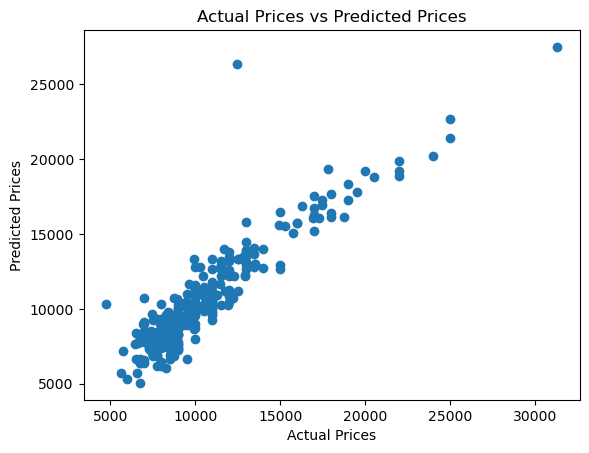

In [46]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [53]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [51]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    return mse,r2

In [56]:
lasso = Lasso()
parameters = {'alpha': [0.1, 1, 10, 100, 1000]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_mse, lasso_r2 = evaluate_model(lasso_regressor, X_train, y_train, X_test, y_test)
print(f'Lasso Regression - Mean Squared Error: {lasso_mse}')
print(f'Lasso Regression - R-squared: {lasso_r2}')

Lasso Regression - Mean Squared Error: 2203043.8231437025
Lasso Regression - R-squared: 0.8348888040611082


In [57]:
ridge = Ridge()
parameters = {'alpha': [0.1, 1, 10, 100, 1000]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_mse, ridge_r2 = evaluate_model(ridge_regressor, X_train, y_train, X_test, y_test)
print(f'Ridge Regression - Mean Squared Error: {ridge_mse}')
print(f'Ridge Regression - R-squared: {ridge_r2}')

Ridge Regression - Mean Squared Error: 2203043.8231437025
Ridge Regression - R-squared: 0.8348888040611082


# Interview Questions:


In [ ]:
1.What is Normalization & Standardization and how is it helpful?

In [ ]:
Normalization and Standardisation are similar these are the process of making our data scale free and unit free,these are used in data proccessing.both techniques are help to to make sure all features in our data have similar scales, which makes many machine learnig algorithms works better.Normalization is used when the data is not in normal distribution and standardization is used when the data is in normal distrinution. 

In [ ]:
2.What techniques can be used to address multicollinearity in multiple linear regression?

In [ ]:
1. removing redundant variables
2.combine variables
3.calculate the variance inflation factor